# Keyphrase similarity

Finetuning transformers to calculate similarity between sentences and keyphrases.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/keyphrase-similarity](https://github.com/huseinzol05/Malaya/tree/master/example/keyphrase-similarity).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

In [1]:
import malaya
import numpy as np

### List available Transformer models

In [2]:
malaya.keyword_extraction.available_transformer()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,443.0,112.0,0.99403,0.99568,0.99485
tiny-bert,59.5,15.1,0.99494,0.99707,0.99600
alxlnet,53.0,14.0,0.98170,0.99182,0.98663
xlnet,472.0,120.0,0.99667,0.99819,0.99742


We trained on [Twitter Keyphrase Bahasa](https://github.com/huseinzol05/Malay-Dataset/tree/master/keyphrase/twitter-bahasa) and [Malaysia Entities](https://github.com/huseinzol05/Malay-Dataset#malaysia-entities).

Example training set,

In [3]:
# !wget https://raw.githubusercontent.com/huseinzol05/Malay-Dataset/master/keyphrase/twitter-bahasa/topics.json

import json

with open('topics.json') as fopen:
    topics = set(json.load(fopen).keys())
    
list_topics = list(topics)
len(list_topics)

949

In [4]:
import random

def get_data(data):
    
    if len(set(data[1]) & topics) and random.random() > 0.2:
        t = random.choice(data[1])
        label = 1
    else:
        s = (set(data[1]) | set())
        t = random.choice(list(topics - s))
        label = 0
    
    return data[0], t, label

In [14]:
data = ('Peguam dikuarantin, kes 1MDB ditangguh', ['najib razak'])

In [23]:
get_data(data)

('Peguam dikuarantin, kes 1MDB ditangguh', 'najib razak', 1)

Some time will returned random topics inside corpus and give label `0`.

In [22]:
get_data(data)

('Peguam dikuarantin, kes 1MDB ditangguh', 'car camera', 0)

### Load transformer model

```python
def transformer(model: str = 'bert', quantized: bool = False, **kwargs):
    """
    Load Transformer keyword similarity model.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
        
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: model
        List of model classes:
        
        * if `bert` in model, will return `malaya.model.bert.KeyphraseBERT`.
        * if `xlnet` in model, will return `malaya.model.xlnet.KeyphraseXLNET`.
    """
```

In [5]:
tiny_bert = malaya.keyword_extraction.transformer(model = 'tiny-bert')
alxlnet = malaya.keyword_extraction.transformer(model = 'alxlnet')

In [6]:
# !wget https://raw.githubusercontent.com/huseinzol05/Malay-Dataset/master/keyphrase/twitter-bahasa/testset-keyphrase.json

with open('testset-keyphrase.json') as fopen:
    testset = json.load(fopen)

In [7]:
testset[:10]

[['Takdak gambar raya ', 'myburgerlab restaurant', 0],
 ['Menyampah aku tngk cerita ayda jebat pukul 7 ni, mcm bodoh je',
  'samsung smartphone',
  0],
 ['Alhamdulillah ala kulli hal.', 'fifa', 0],
 ['@mubimalaysia @sharifahamani 018 9828689 no fon saya kak amani',
  'jabatan parlimen malaysia',
  0],
 ['Ya ga seru lah, seruan lawan Burnley sama Brighton ', 'asus smartphone', 0],
 ['Senyumlah. Allah tahu kau sedih tapi senyumlah. Dont give up now. Yelah life is not always rainbow and flowers kan. Kadang-kadang you stuck on cloudy day and step on thorn.',
  'shop property',
  0],
 ['Serabut fikir pasal kerja.. Pastu memalukan diri kat lrt! Kau ingat kau anak menteri ke nak naik free? Confident je https://t.co/Qe3XgyUllt',
  'pengangkutan awam',
  1],
 ['Melaka peeps !!! I jumpe satu restaurant yg best sangat kalau nk lepak2 or makan with whole family !! Tmpt selesa ! Makanan pun sedap ! Harga pun not bad !!! \n\nrestaurant markisar https://t.co/dnwkqqlt5z',
  'gejala sosial',
  1],
 ['@

#### predict batch of strings with probability

```python
def predict_proba(self, strings_left: List[str], strings_right: List[str]):
    """
    calculate similarity for two different batch of texts.

    Parameters
    ----------
    string_left : List[str]
    string_right : List[str]

    Returns
    -------
    result : List[float]
    """
```

you need to give list of left strings, and list of right strings.

first left string will compare will first right string and so on.

similarity model only supported `predict_proba`.

In [8]:
texts, keyphrases, labels = [], [], []
for i in range(10):
    texts.append(testset[i][0])
    keyphrases.append(testset[i][1])
    labels.append(testset[i][2])

In [9]:
np.around(tiny_bert.predict_proba(texts, keyphrases))

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1.], dtype=float32)

In [10]:
np.around(alxlnet.predict_proba(texts, keyphrases))

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1.], dtype=float32)

In [12]:
np.around(tiny_bert.predict_proba(texts, keyphrases)) == np.array(labels)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [13]:
np.around(alxlnet.predict_proba(texts, keyphrases)) == np.array(labels)

array([False,  True, False, False, False, False,  True,  True,  True,
        True])

### Vectorize

Let say you want to visualize sentences in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, strings: List[str]):
    """
    Vectorize list of strings.

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: np.array
    """
```

In [16]:
v_texts = tiny_bert.vectorize(texts)
v_keyphrases = tiny_bert.vectorize(keyphrases)
v_texts.shape, v_keyphrases.shape

((10, 312), (10, 312))

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(v_keyphrases, v_texts)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

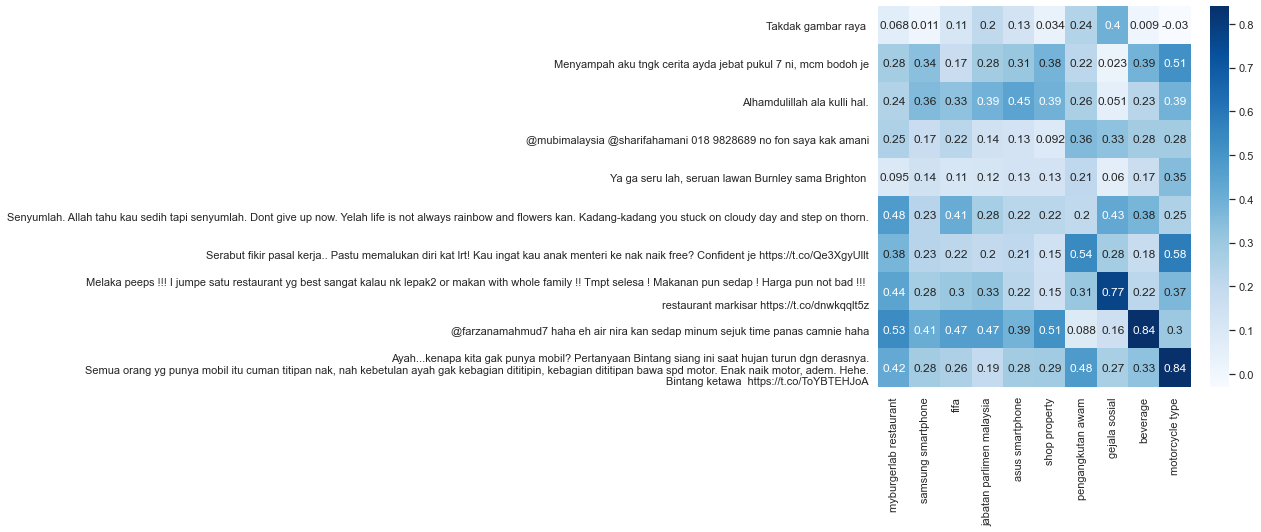

In [28]:
plt.figure(figsize = (7, 7))
g = sns.heatmap(
    similarities,
    cmap = 'Blues',
    xticklabels = keyphrases,
    yticklabels = texts,
    annot = True,
)
plt.show()

In [29]:
v_texts = alxlnet.vectorize(texts)
v_keyphrases = alxlnet.vectorize(keyphrases)
v_texts.shape, v_keyphrases.shape

((10, 768), (10, 768))

In [30]:
similarities = cosine_similarity(v_keyphrases, v_texts)

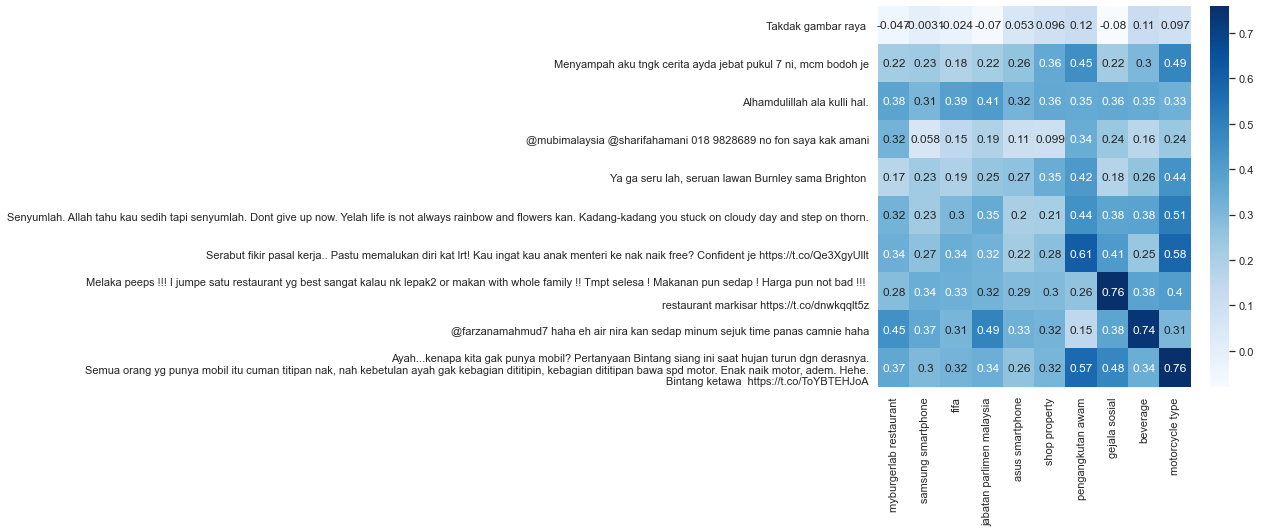

In [31]:
plt.figure(figsize = (7, 7))
g = sns.heatmap(
    similarities,
    cmap = 'Blues',
    xticklabels = keyphrases,
    yticklabels = texts,
    annot = True,
)
plt.show()

In [32]:
text = 'Peguam dikuarantin, kes 1MDB ditangguh'
label = 'najib razak'

In [33]:
v = tiny_bert.vectorize([text, label])

In [34]:
cosine_similarity(v)

array([[0.99999994, 0.48644015],
       [0.48644015, 1.0000002 ]], dtype=float32)

In [35]:
v = alxlnet.vectorize([text, label])

In [36]:
cosine_similarity(v)

array([[1.0000002, 0.3488139],
       [0.3488139, 1.0000001]], dtype=float32)